#### ✅ STEP 1: Loading Dataset

In [192]:
import pandas as pd
df=pd.read_csv(r"C:\Users\KOMAL\Downloads\loan_approval_datasets.csv")
df

,loan_id,dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Yes
1,2,0,Not Graduate,No,4100000,12200000,8,417,2700000,2200000,8800000,3300000,No
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,No
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,No
4,5,5,Not Graduate,No,9800000,24200000,20,382,12400000,8200000,29400000,5000000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,No
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Yes
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,No
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Yes


#### 📚 STEP 2: ANALYZING THE DATA
##### 🧾 What is this dataset about?
##### This dataset is from a Loan Prediction system, where the goal is to predict whether a loan should be approved (Loan_Status = Y) or not (Loan_Status = N) based on various applicant details. It simulates the decision-making process that banks or financial institutions follow when someone applies for a loan.
##### 🎯 Objective of the Dataset
##### The main objective is classification:
##### 👉 Predict whether a loan application will be approved or rejected based on applicant information.
##### Features in dataset are :-
##### Loan_ID --> Unique ID for each loan application
##### Dependents -->Number of people financially dependent on the applicant (0, 1, 2, 3+).
##### Education --> Applicant’s education level (Graduate/Not Graduate)
##### Self_Employed --> Self-employed means the person runs their own business, works freelance, or is not working for a regular employer.
##### Income_Annum --> The total yearly (annual) income of the applicant. This helps lenders assess how much the applicant earns in a year.
##### Loan_Amount --> The amount of money the applicant is requesting as a loan. Usually measured in currency units like rupees or dollars.
##### Loan_Term --> The period over which the applicant agrees to repay the loan. It is usually expressed in months (e.g., 360 months = 30 years).
##### CIBIL_Score --> Applicant’s credit score, used to evaluate creditworthiness
##### Residential_Assets_Value --> Value of the applicant’s residential properties
##### Commercial_Assets_Value --> Value of commercial properties owned by the applicant
##### Luxury_Assets_Value --> Value of luxury assets like cars, jewelry, etc.
##### Bank_Asset_Value --> Total value of assets held in the applicant’s bank
##### Loan_Status --> Target Variable: Approved, Rejected

#### ✅ STEP 3: DATA CLEANING AND PREPROCESSING
##### Here, First we will check whether there is requirement of data cleaning or not.

In [193]:
df.isnull().sum()

loan_id                     0
dependents                  0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

##### Here , there are no missing value so ,there is no requirement for the data clenaing.

#### 📊 Now ,as the data is already cleaned, next step is to preprocess the data


In [194]:
df.head()

,loan_id,dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Yes
1,2,0,Not Graduate,No,4100000,12200000,8,417,2700000,2200000,8800000,3300000,No
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,No
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,No
4,5,5,Not Graduate,No,9800000,24200000,20,382,12400000,8200000,29400000,5000000,No


In [195]:
df["dependents"].value_counts()

dependents
4    752
3    727
0    712
2    708
1    697
5    673
Name: count, dtype: int64

In [196]:
df["education"].value_counts()  # apply label encoding as there are only two columns

education
Graduate        2144
Not Graduate    2125
Name: count, dtype: int64

In [197]:
df["self_employed"].value_counts()

self_employed
No     2384
Yes    1885
Name: count, dtype: int64

In [198]:
df.describe()

,loan_id,dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   dependents                4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [200]:
df.drop(columns="loan_id")

,dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Yes
1,0,Not Graduate,No,4100000,12200000,8,417,2700000,2200000,8800000,3300000,No
2,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,No
3,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,No
4,5,Not Graduate,No,9800000,24200000,20,382,12400000,8200000,29400000,5000000,No
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,No
4265,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Yes
4266,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,No
4267,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Yes


#### ✅ Feature Selection 
##### It is statistical method used to select import features based on their statistical meaning w.r.t. dependent features.

#### Separating the categorical and numerical features

In [201]:
numeric=df[["dependents","income_annum", "loan_amount", "loan_term", "cibil_score", "residential_assets_value", "commercial_assets_value", "luxury_assets_value", "bank_asset_value"
]]

In [202]:
categoric=df[["education","self_employed","loan_status"]]

#### Converting the categorical columns to the numerical form

In [203]:
categoric.loc[:, "education"] = categoric["education"].replace({"Graduate": 1, "Not Graduate": 0})

C:\Users\KOMAL\AppData\Local\Temp\ipykernel_12408\2355354568.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  categoric.loc[:, "education"] = categoric["education"].replace({"Graduate": 1, "Not Graduate": 0})


In [204]:
categoric.loc[:, "self_employed"] = categoric["self_employed"].replace({"Yes": 1, "No": 0})

C:\Users\KOMAL\AppData\Local\Temp\ipykernel_12408\2958773232.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  categoric.loc[:, "self_employed"] = categoric["self_employed"].replace({"Yes": 1, "No": 0})


In [205]:
categoric

,education,self_employed,loan_status
0,1,0,Yes
1,0,0,No
2,1,0,No
3,1,0,No
4,0,0,No
...,...,...,...
4264,1,1,No
4265,0,1,Yes
4266,0,0,No
4267,0,0,Yes


#### ✅  CHI SQUARE TEST
##### The Chi-Square Test (χ² test) is a statistical test used to determine whether there is a significant association between two categorical variables.In feature selection, it helps identify which independent categorical features are most relevant to the target variable (also categorical).

In [206]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder


X = categoric.drop("loan_status", axis=1)
y = categoric["loan_status"]

# Step 5: Apply Chi-Square Test
chi_scores = chi2(X, y)

chi2_df = pd.DataFrame({
    "Feature": X.columns,
    "Chi2 Score": chi_scores[0],
    "P-value": chi_scores[1]
})

# Step 7: Sort features by importance
chi2_df.sort_values(by="Chi2 Score", ascending=False, inplace=True)
print(chi2_df)


         Feature  Chi2 Score   P-value
1  self_employed    0.117928  0.731292
0      education    0.051394  0.820655


##### Features with high Chi2 scores and low P-values are strong candidates for selection.
##### Here education, self-employed column basically have normal relationship with target.

#### ✅ ANOVA Test
##### It is used to find the "f-score" that is used to check if there is any relationship between the categorical and numerical column.
##### Columns with highest f-score are considered as best(or having best relationship with the target.


In [207]:
categoric.loc[:, "loan_status"] = categoric["loan_status"].replace({"Yes": 1, "No": 0})
categoric

C:\Users\KOMAL\AppData\Local\Temp\ipykernel_12408\3066915367.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  categoric.loc[:, "loan_status"] = categoric["loan_status"].replace({"Yes": 1, "No": 0})


,education,self_employed,loan_status
0,1,0,1
1,0,0,0
2,1,0,0
3,1,0,0
4,0,0,0
...,...,...,...
4264,1,1,0
4265,0,1,1
4266,0,0,0
4267,0,0,1


In [208]:
from sklearn.feature_selection import f_classif, SelectKBest
select=SelectKBest(f_classif,k=5)
column=select.fit_transform(numeric,categoric["loan_status"])
selected=select.get_support(indices=True)
print(selected)
print(numeric.columns)
print(select.scores_)

[0 2 3 4 7]
Index(['dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value'],
      dtype='object')
[1.40060017e+00 9.84668835e-01 1.11317638e+00 5.52254580e+01
 6.23505459e+03 8.80876699e-01 2.90151593e-01 1.02072828e+00
 1.96065908e-01]


##### This shows that 'Dependents', 'loan_amount', 'loan_term', 'cibil_score', 'luxury_assets_value', columns have better f-score with Target i.e. Loan Status.
##### But for now we will keep all the columns.

#### ✅ OUTLIER DETECTION

##### Outlier detection is the process of identifying data points that differ significantly from the rest of the data.These unusual points are called outliers.
##### Case 1: If column is  normally distributed , we apply z-score method.
##### Case 1: If column is randomly distributed , we use DBSCAN

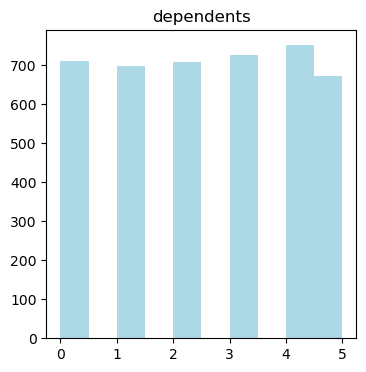

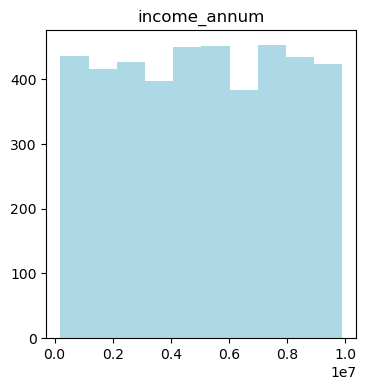

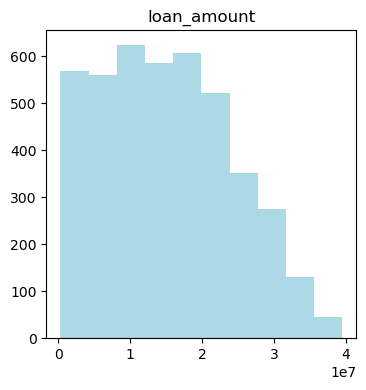

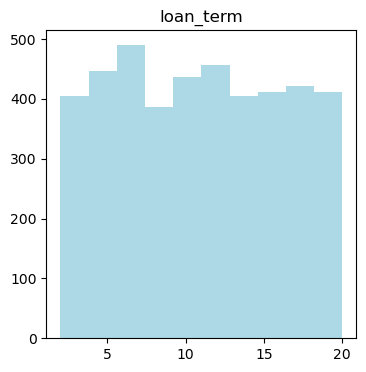

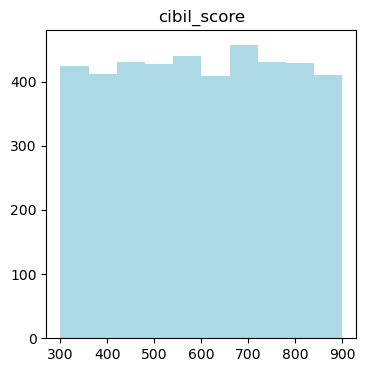

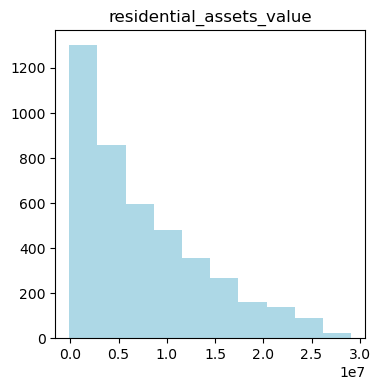

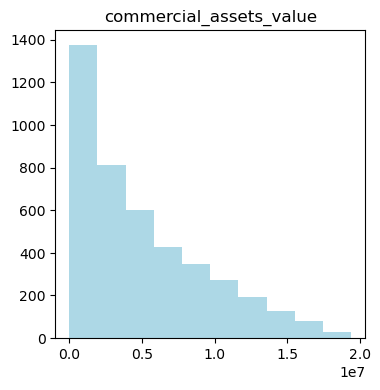

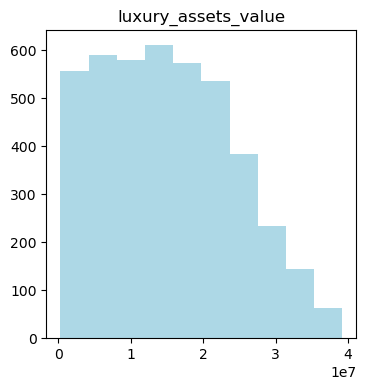

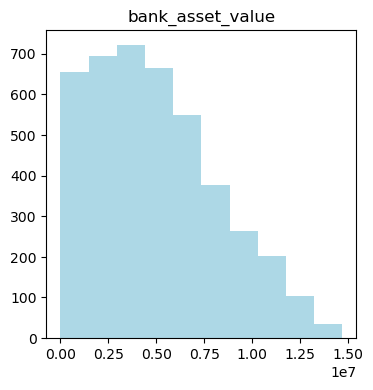

In [209]:
import matplotlib.pyplot as plt
for i in numeric.columns:
    plt.figure(figsize=(4,4))
    plt.hist(numeric[i],color="lightblue")
    plt.title(i)
    plt.show()

##### ✅  Here residential_assets_value,commercial_assets_value, bank_assets_value have normal distribution
##### So for normal distribution we will use z-score for outlier dtetction

In [210]:
def outlier_detect(columns):
    mean=columns.mean()
    std=columns.std()
    z_score=(columns-mean)/std
    return columns[(z_score>3) | (z_score<-3)]

In [211]:
a=outlier_detect(numeric["residential_assets_value"])
b=outlier_detect(numeric["commercial_assets_value"])
c=outlier_detect(numeric["bank_asset_value"])

In [212]:
categoric.shape,numeric.shape

((4269, 3), (4269, 9))

In [213]:
print(len(a)) ## means there are 16 outier in ressidential assets
print(len(b))## means there are 17 outier in commercial assets
print(len(c))## means there are 0 outier in bank assets

16
17
0


In [214]:
f=numeric["residential_assets_value"].isin(a)
numeric=numeric[~f]
categoric=categoric[~f]
categoric.shape,numeric.shape

((4253, 3), (4253, 9))

In [215]:
f=numeric["commercial_assets_value"].isin(b)
numeric=numeric[~f]
categoric=categoric[~f]
categoric.shape,numeric.shape

((4236, 3), (4236, 9))

##### ✅ For randomly Distributed column that is credit history we  will use DBSCAN
##### randomly distributed columns are "dependents","income_annum", "loan_amount", "loan_term", "cibil_score",  "luxury_assets_value", 

In [216]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
data = pd.DataFrame({
    "dependents": numeric["dependents"],
    "income_annum": numeric["income_annum"],
    "loan_amount": numeric["loan_amount"],
    "loan_term": numeric["loan_term"],
    "cibil_score": numeric["cibil_score"],
    "luxury_assets_value": numeric["luxury_assets_value"],
    "loan_status": categoric["loan_status"]
})

# Step 2: Apply MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)




In [217]:
print(data)

[[0.4        0.96907216 0.75510204 ... 0.79666667 0.57583548 1.        ]
 [0.         0.40206186 0.30357143 ... 0.195      0.218509   0.        ]
 [0.6        0.91752577 0.75       ... 0.34333333 0.84832905 0.        ]
 ...
 [0.4        0.64948454 0.60204082 ... 0.26166667 0.45758355 0.        ]
 [0.2        0.40206186 0.31887755 ... 0.8        0.35475578 1.        ]
 [0.2        0.92783505 0.75       ... 0.51166667 0.91002571 1.        ]]


#### Finding the value for eps using kneighbors and kneedle algorithm

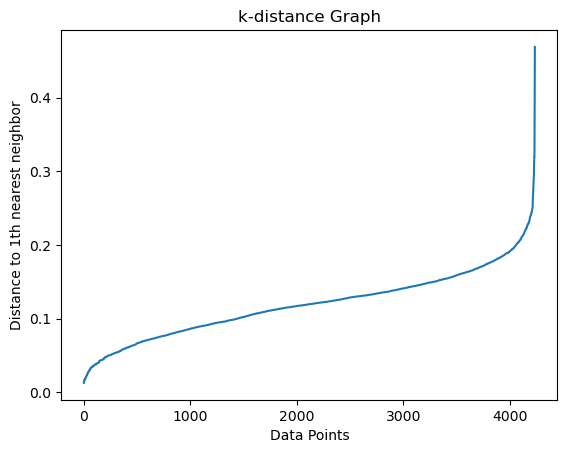

In [218]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Step 1: Calculate the distances of the k-nearest neighbors
neighbors = NearestNeighbors(n_neighbors=4)  # k=4 as an example
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)

# Step 2: Sort the distances for each point and plot
distances = np.sort(distances[:, 1], axis=0)  
plt.plot(distances)
plt.title('k-distance Graph')
plt.xlabel('Data Points')
plt.ylabel('Distance to 1th nearest neighbor')
plt.show()


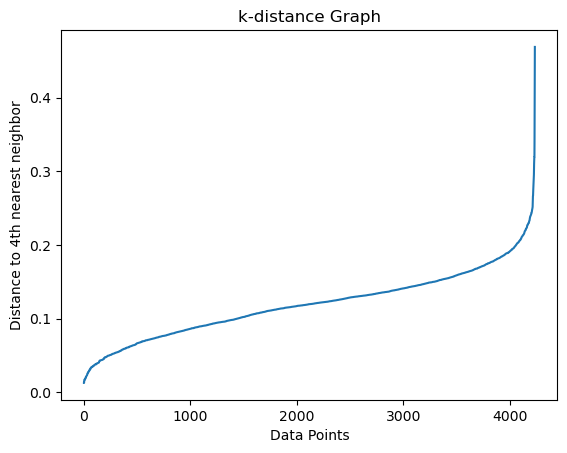

Optimal eps value: 0.24379408941913003


In [219]:
from kneed import KneeLocator
neighbors = NearestNeighbors(n_neighbors=4)  
neighbors_fit = neighbors.fit(data)
distances, indices = neighbors_fit.kneighbors(data)

# Step 2: Sort the distances for each point and get the distance of the 4th neighbor (k=4)
distances = np.sort(distances[:, 1], axis=0)  # 4th neighbor
plt.plot(distances)
plt.title('k-distance Graph')
plt.xlabel('Data Points')
plt.ylabel('Distance to 4th nearest neighbor')
plt.show()

# Step 3: Apply Kneedle to find the "elbow" point
kneedle = KneeLocator(range(1, len(distances) + 1), distances, curve='convex', direction='increasing')

# The elbow point (optimal eps) can be found here
optimal_eps = distances[kneedle.elbow]

print(f"Optimal eps value: {optimal_eps}")


##### As we not getting -1, it means: Our DBSCAN configuration considers all points as part of some cluster, so no point is being treated as noise.

In [220]:
import numpy as np
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.243,min_samples=8)  # Apply DBSCAN clustering
dbscan.fit(data)
labels=dbscan.labels_    # Get labels assigned to each data point
print(np.unique(labels))   # This shows the distinct clusters and outliers

print(np.unique(labels,return_counts=True)) # Shows how many points are in each cluster or marked as noise

# -1 → Noise / Outliers
# 0, 1, 2, ... → Cluster labels

[-1  0  1  2  3  4]
(array([-1,  0,  1,  2,  3,  4], dtype=int64), array([ 170, 2531, 1515,    5,   11,    4], dtype=int64))


#### ✅  removing the outlier using filters

In [221]:
f=labels!=-1  # filtering rows whose label=-1 i.e. dropping them
numeric=numeric[f]
numeric.shape

(4066, 9)

In [222]:
categoric=categoric[f]
categoric.shape

(4066, 3)

####  ✅ Converting the encoded value to normal form

In [223]:
categoric.loc[:, "education"] = categoric["education"].replace({1:"Graduate", 0: "Not Graduate"})
categoric.loc[:, "self_employed"] = categoric["self_employed"].replace({ 1:"Yes",0: "No"})
categoric.loc[:, "loan_status"] = categoric["loan_status"].replace({ 1:"Yes", 0: "No"})

In [224]:
print(categoric)

         education self_employed loan_status
0         Graduate            No         Yes
1     Not Graduate            No          No
2         Graduate            No          No
3         Graduate            No          No
5         Graduate            No          No
...            ...           ...         ...
4264      Graduate           Yes          No
4265  Not Graduate           Yes         Yes
4266  Not Graduate            No          No
4267  Not Graduate            No         Yes
4268      Graduate            No         Yes

[4066 rows x 3 columns]


#### ✅  now conactenating the  numeric and categoric column

In [225]:
df1=pd.concat((numeric,categoric),axis=1)
df1

,dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed,loan_status
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Graduate,No,Yes
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Not Graduate,No,No
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Graduate,No,No
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Graduate,No,No
5,0,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Graduate,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,Graduate,Yes,No
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Not Graduate,Yes,Yes
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Not Graduate,No,No
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,Not Graduate,No,Yes


#### ✅ Encoding
##### Now encoding the categorical columns to numerical form using the LabelEncoder method

In [226]:
from sklearn.preprocessing import LabelEncoder
e=LabelEncoder()
df1["education"]=e.fit_transform(df1["education"])

e1=LabelEncoder()
df1["self_employed"]=e1.fit_transform(df1["self_employed"])

e2=LabelEncoder()
df1["loan_status"]=e2.fit_transform(df1["loan_status"])

In [227]:
print(df1)

      dependents  income_annum  loan_amount  loan_term  cibil_score  \
0              2       9600000     29900000         12          778   
1              0       4100000     12200000          8          417   
2              3       9100000     29700000         20          506   
3              3       8200000     30700000          8          467   
5              0       4800000     13500000         10          319   
...          ...           ...          ...        ...          ...   
4264           5       1000000      2300000         12          317   
4265           0       3300000     11300000         20          559   
4266           2       6500000     23900000         18          457   
4267           1       4100000     12800000          8          780   
4268           1       9200000     29700000         10          607   

      residential_assets_value  commercial_assets_value  luxury_assets_value  \
0                      2400000                 17600000            

#### ✅ SPLITTING DATA INTO INDEPENDENT AND TARGET VARIABLE

In [228]:
x=df1.iloc[:,:-1]  # INDEPENDENT VARIABLE
y=df1.iloc[:,-1]  # TARGET VARIABLE

In [229]:
x

,dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,education,self_employed
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0,0
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1,0
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000,0,0
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000,0,0
5,0,4800000,13500000,10,319,6800000,8300000,13700000,5100000,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000,0,1
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000,1,1
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1,0
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000,1,0


In [230]:
y

0       1
1       0
2       0
3       0
5       0
       ..
4264    0
4265    1
4266    0
4267    1
4268    1
Name: loan_status, Length: 4066, dtype: int32

#### ✅ Scaling -->
#### ✅ Scaling so that whole data should be on same scale

In [231]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4066 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   dependents                4066 non-null   int64
 1   income_annum              4066 non-null   int64
 2   loan_amount               4066 non-null   int64
 3   loan_term                 4066 non-null   int64
 4   cibil_score               4066 non-null   int64
 5   residential_assets_value  4066 non-null   int64
 6   commercial_assets_value   4066 non-null   int64
 7   luxury_assets_value       4066 non-null   int64
 8   bank_asset_value          4066 non-null   int64
 9   education                 4066 non-null   int32
 10  self_employed             4066 non-null   int32
 11  loan_status               4066 non-null   int32
dtypes: int32(3), int64(9)
memory usage: 365.3 KB


In [232]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x

array([[-0.28911758,  1.73487674,  1.77846843, ...,  1.01895862,
        -1.000492  , -0.89393235],
       [-1.47474753, -0.28659251, -0.26879995, ..., -0.47585611,
         0.99950824, -0.89393235],
       [ 0.30369739,  1.55110681,  1.75533546, ...,  2.54557791,
        -1.000492  , -0.89393235],
       ...,
       [-0.28911758,  0.59550316,  1.08447915, ...,  0.79632664,
         0.99950824, -0.89393235],
       [-0.88193255, -0.28659251, -0.19940102, ...,  0.31925811,
         0.99950824, -0.89393235],
       [-0.88193255,  1.58786079,  1.75533546, ...,  2.29114136,
        -1.000492  , -0.89393235]])

#### ✅ Splitting Dataset into training and testing data(last step of preprocessing)

In [235]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [236]:
x_train.shape,x_test.shape

((3252, 11), (814, 11))

#### ✅ STEP 4 :  Choosing the best model
#### 1. Logistic Regression

In [237]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)
print(y_pred)

[1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1
 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1
 1 0 0 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0
 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 1 1 1 0
 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0
 0 1 1 1 0 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 1 1 0
 0 1 0 1 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1
 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 0
 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 1 0 0
 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 1
 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0
 1 0 1 0 0 1 0 1 1 0 1 1 

In [238]:
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score, confusion_matrix
print("Accuracy score for logistic regression model is :",accuracy_score(y_test,y_pred))
print("Precision score for logistic regression model is :",precision_score(y_test,y_pred))
print("Recall score for logistic regression model is :",recall_score(y_test,y_pred))
print("Confusion Matrix for logistic regression model is :\n",confusion_matrix(y_test,y_pred))

Accuracy score for logistic regression model is : 0.9275184275184275
Precision score for logistic regression model is : 0.9471624266144814
Recall score for logistic regression model is : 0.937984496124031
Confusion Matrix for logistic regression model is :
 [[271  27]
 [ 32 484]]


#### 2. Decision Tree

In [239]:
from sklearn.tree import DecisionTreeClassifier    #72 acc
tree=DecisionTreeClassifier(max_depth=7,min_samples_split=3)
tree.fit(x_train,y_train)
y_pred=tree.predict(x_test)

In [240]:
print("Accuracy score for decision tree model is :",accuracy_score(y_test,y_pred))
print("Precision score for decision tree model is :",precision_score(y_test,y_pred))
print("Recall score for  decision tree model is :",recall_score(y_test,y_pred))
print("Confusion Matrix for decision tree  model is :\n",confusion_matrix(y_test,y_pred))

Accuracy score for decision tree model is : 0.984029484029484
Precision score for decision tree model is : 0.979047619047619
Recall score for  decision tree model is : 0.9961240310077519
Confusion Matrix for decision tree  model is :
 [[287  11]
 [  2 514]]


#### 3. Random Forest Regressor

In [241]:
from sklearn.ensemble import RandomForestClassifier
c=RandomForestClassifier(n_estimators=200,max_depth=10,min_samples_split=5)
c.fit(x_train,y_train)
y_pred=c.predict(x_test)

In [242]:
print("Accuracy score for Random Forest Classifier model is :",accuracy_score(y_test,y_pred))
print("Precision score for Random Forest Classifier model is :",precision_score(y_test,y_pred))
print("Recall score for  Random Forest Classifier model is :",recall_score(y_test,y_pred))
print("Confusion Matrix for Random Forest Classifier  model is :\n",confusion_matrix(y_test,y_pred))

Accuracy score for Random Forest Classifier model is : 0.9877149877149877
Precision score for Random Forest Classifier model is : 0.9922178988326849
Recall score for  Random Forest Classifier model is : 0.9883720930232558
Confusion Matrix for Random Forest Classifier  model is :
 [[294   4]
 [  6 510]]


#### 4. KNN (K-NEAREST NEIGHBORS CLASSIFIER)

In [243]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)

In [244]:

print("Accuracy score for KNN model is :", accuracy_score(y_test, y_pred))
print("Precision score for KNN model is :", precision_score(y_test, y_pred))
print("Recall score for KNN model is :", recall_score(y_test, y_pred))
print("Confusion Matrix for KNN model is :\n", confusion_matrix(y_test, y_pred))


Accuracy score for KNN model is : 0.9066339066339066
Precision score for KNN model is : 0.9382470119521913
Recall score for KNN model is : 0.9127906976744186
Confusion Matrix for KNN model is :
 [[267  31]
 [ 45 471]]


#### 5. SVC (SUPPORT VECTOR CLASSIFIER)

In [247]:
from sklearn.svm import SVC
s=SVC(kernel="rbf",C=0.3)
s.fit(x_train,y_train)
y_pred=s.predict(x_test)

In [249]:
# Assuming svc_pred = svc_model.predict(X_test)

print("Accuracy score for SVC model is :", accuracy_score(y_test, y_pred))
print("Precision score for SVC model is :", precision_score(y_test, y_pred))
print("Recall score for SVC model is :", recall_score(y_test, y_pred))
print("Confusion Matrix for SVC model is :\n", confusion_matrix(y_test,y_pred))


Accuracy score for SVC model is : 0.9484029484029484
Precision score for SVC model is : 0.9759036144578314
Recall score for SVC model is : 0.9418604651162791
Confusion Matrix for SVC model is :
 [[286  12]
 [ 30 486]]


##### As random forest is giving better result out of all model, so we will select the RANDOM FOREST CLASSIFIER for loan approval system

#### ✅ STEP 5: MAKING PREDICTION

In [264]:
def predict_from_user_input(model):
    print("<----------- Enter the following details ------------->")
    
    dependents = int(input("Enter number of dependents: "))
    income_annum = int(input("Enter annual income: "))
    loan_amount = int(input("Enter loan amount: "))
    loan_term = int(input("Enter loan term (in months): "))
    cibil_score = int(input("Enter CIBIL score: "))
    residential_assets_value = int(input("Enter residential assets value: "))
    commercial_assets_value = int(input("Enter commercial assets value: "))
    luxury_assets_value = int(input("Enter luxury assets value: "))
    bank_asset_value = int(input("Enter bank asset value: "))
    education = input("Enter education (Graduate, Not Graduate): ")
    self_employed = input("Enter self_employed status (Yes, No): ")

    # Encoding 'education' and 'self_employed'
    education = e.fit_transform([education])[0]
    self_employed = e1.fit_transform([self_employed])[0]

    # Step 3: Create DataFrame
    input_data = pd.DataFrame([[dependents, income_annum, loan_amount, loan_term, cibil_score, 
                               residential_assets_value, commercial_assets_value, luxury_assets_value, 
                               bank_asset_value, education, self_employed]],
                               columns=["dependents", "income_annum", "loan_amount", "loan_term", 
                                        "cibil_score", "residential_assets_value", "commercial_assets_value", 
                                        "luxury_assets_value", "bank_asset_value", "education", "self_employed"])
    #print("\nInput Data:")
    #print(input_data)

    # Step 4: Make prediction
    prediction = model.predict(input_data)[0]

    # Step 5: Display result
    print("<--------------------------------Loading THe Status------------------------------------------->")
    if prediction == 1:
        print("Loan Status: Approved!!")
    else:
        print("Loan Status: Rejected")


In [265]:
predict_from_user_input(c)

<----------- Enter the following details ------------->


Enter number of dependents:  5
Enter annual income:  1030000
Enter loan amount:  552771
Enter loan term (in months):  14
Enter CIBIL score:  231
Enter residential assets value:  2442
Enter commercial assets value:  26768180
Enter luxury assets value:  1768326931
Enter bank asset value:  671537
Enter education (Graduate, Not Graduate):  Graduate
Enter self_employed status (Yes, No):  No


<--------------------------------Loading THe Status------------------------------------------->
Loan Status: Approved!!


C:\Users\KOMAL\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
